# Module 1  

**PHY657 Statistics & Data Analysis**  
Breck Meagher (bnmeaghe@syr.edu)  
January 30, 2026

### **Activity 1: Simple Regression Problem, Frequentist Approach**

**Polynomial Curve Fitting - 1st Method (essentially linear least square fitting).**  

You will generate a set of N data generated from the function $y=\sin(2\pi x)$, smeared with random noise according to a Gaussian distribution with $\sigma = 0.3$.  

You can start by generating 10 points and then progress to 100, 1000 to see the difference between different data sets. These represent our training sample $\hat{t}$. Our goal is to predict the values of this target variable for some new value of $\hat{x}$. This is eequivalent to identify type of the underlying function (in this case $\sin(2\pi x)$) and some shape parameter (in this case $2\pi x$).  

---

#### **Activity 1A**  
**Introductory activity:** Plot these data sets (y vs. x, x is generated as a uniform distribution between 0 and 1).

In [57]:
%matplotlib widget
%matplotlib inline
from ipywidgets import *
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit, minimize

plt.style.use('dark_background')
plt.close('all')

fontsize = 14
mpl.rcParams.update(
    {
        "text.usetex": False,
        "figure.figsize": (9, 6),
        "figure.autolayout": True,
        "font.family": "serif",
        "font.serif": "DejaVu Serif",
        # 'mathtext.fontset': 'cm',
        "lines.linewidth": 1.5,
        "font.size": fontsize,
        "xtick.labelsize": fontsize,
        "ytick.labelsize": fontsize,
        "legend.fancybox": True,
        "legend.fontsize": fontsize,
        "legend.framealpha": 0.7,
        "legend.handletextpad": 0.5,
        "legend.labelspacing": 0.2,
        "legend.loc": "best",
        "axes.edgecolor": "#b0b0b0",
        "grid.color": "#707070",  # grid color"
        "xtick.color": "#b0b0b0",
        "ytick.color": "#b0b0b0",
        "savefig.dpi": 80,
        "pdf.compression": 9,
    }
)

np.random.seed(0)

Initialize data generation:

In [58]:
sigma = 0.3
N = [10,100,1000]

In [59]:
def noisy_sine(x, N, sigma):
    y = np.sin(2 * np.pi * x) + np.random.normal(0, sigma, size=N)
    return y

Generate x and y data to plot using our model.

In [60]:
xx = [np.linspace(0, 1, n) for n in (10, 100, 1000)]
yy = [noisy_sine(xx[i],N[i],sigma) for i in range(3)]

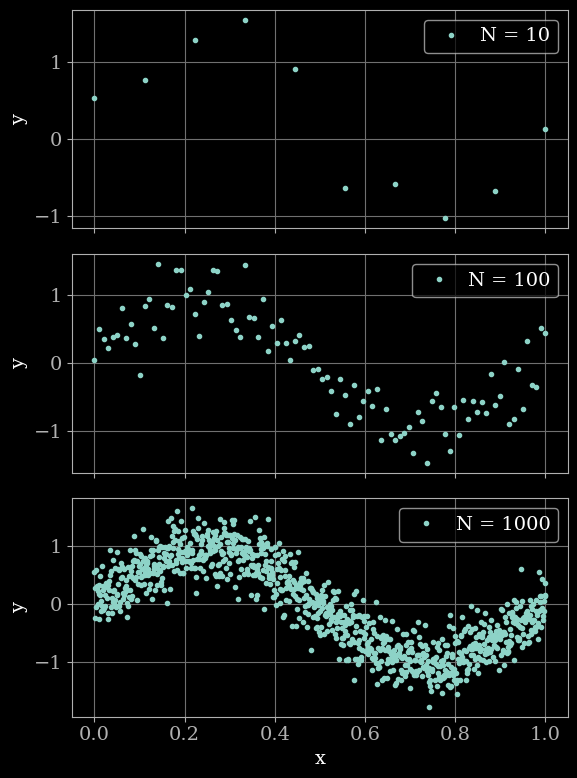

In [61]:
fig, axes = plt.subplots(3, 1, figsize=(6, 8), sharex=True)

for i, ax in enumerate(axes):
    ax.plot(xx[i], yy[i], '.', label=f'N = {N[i]}')
    ax.set_ylabel('y')
    ax.legend()
    ax.grid()

axes[-1].set_xlabel('x')
plt.tight_layout()
plt.show()

#### **Activity 1B**  
Try to do a polynomial fit to the target data set with polynomials 1-9 and compare your results with figure 1.4 of the text.

In [62]:
def poly(x, *coeffs):
    # coeffs = (a0, a1, ..., a_n)
    return sum(c * x**i for i, c in enumerate(coeffs))

def fit_polynomials(x, y, max_degree=9):
    fits = {}
    for deg in range(1, max_degree + 1):
        p0 = np.zeros(deg + 1)  # initial guess
        popt, _ = curve_fit(poly, x, y, p0=p0)
        fits[deg] = popt
    return fits

/tmp/ipykernel_9336/3124220350.py:9: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(poly, x, y, p0=p0)


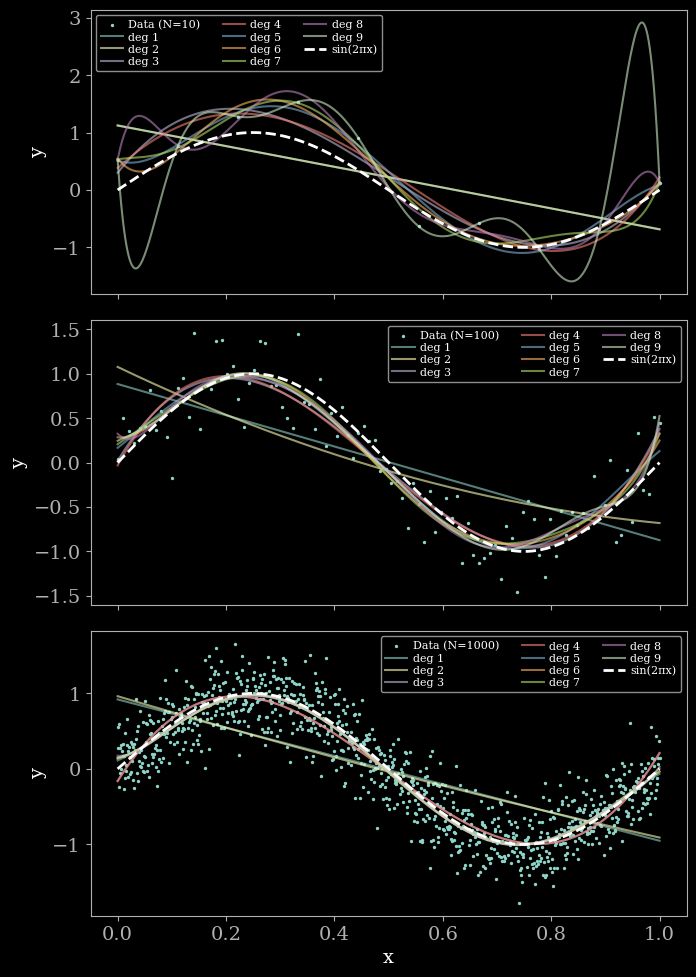

In [63]:
plt.close('all')
fig, axes = plt.subplots(3, 1, figsize=(7, 10), sharex=True)

x_fine = np.linspace(0, 1, 500)

for i, ax in enumerate(axes):
    x = xx[i]
    y = yy[i]

    fits = fit_polynomials(x, y)

    # plot data
    ax.scatter(x, y, s=2, label=f'Data (N={N[i]})')

    # plot fits
    for deg, coeffs in fits.items():
        ax.plot(x_fine, poly(x_fine, *coeffs), alpha=0.6, label=f'deg {deg}')

    # plot sin(2pix)
    ax.plot(x_fine, np.sin(2*np.pi*x_fine), 'w--', lw=2, label='sin(2πx)')

    ax.set_ylabel('y')
    ax.legend(ncol=3, fontsize=8)

axes[-1].set_xlabel('x')
plt.tight_layout()
plt.show()


#### **Analysis 1A**  
**Discuss the outcome as you increase the polynomial order and the relationship between the outcome and the number of data points used.**

As you increase the order of the polynomial, more terms are added to the fitting function. When the number of terms approaches the number of data points, your model is far more likely to overfit your data. For example, when N=10, all the polynomials order 4 and above overfit the data significantly. However, this was not as much of a problem for greater N.

---

#### **Analysis 1B**  
**For polynomial order n=9 and number of data points N=100, compare the noise $\sigma$ of your model with the quantity $\text{E}_{RMS}$ (Eq. 1.3).**

Equation 1.3
$$
E_{RMS}=\sqrt{2E(\mathbf{w^*})/N}
$$

where
$$
E(\mathbf{w^*})=\frac{1}{2}\sum_{i=1}^{N} [y_i-y(x_i;\mathbf{w^*})]^2
$$

sigma = 0.3
E_RMS = 0.286


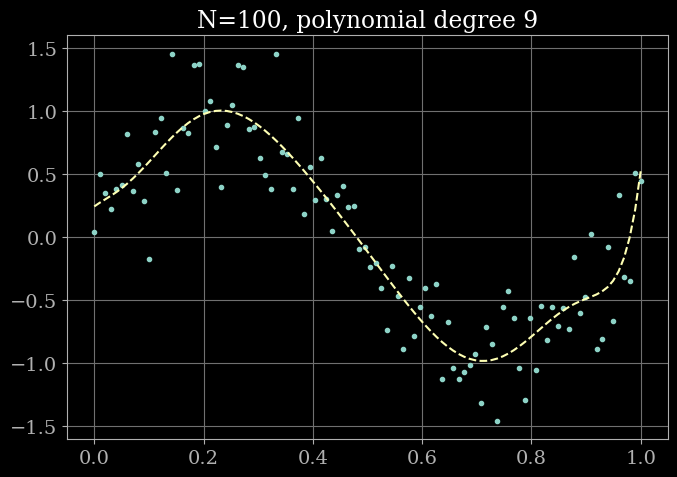

In [64]:
# find the fitting data for N=100 and polynomial degree 9
coeffs = fit_polynomials(xx[1], yy[1])[9]
y_fit = poly(xx[1], *coeffs)

# calculate E and E_RMS from above equations
E = 0.5 * np.sum((yy[1] - y_fit)**2)
E_RMS = np.sqrt(2 * E / len(yy[1]))

# plot N=100 and polynomial 9 just to make sure i'm looking at the right thing
plt.close('all')
plt.figure(figsize=(7,5))
plt.plot(xx[1],yy[1],'.')
plt.plot(xx[1],y_fit,'--')
plt.title('N=100, polynomial degree 9')
plt.grid()

# print E_RMS
print("sigma =", sigma)
print("E_RMS =", round(E_RMS,3))

When the N=100 data is fit to polynomial 9, $\boxed{E_{RMS}=0.272}$.

---

#### **Analysis 1C**  
**For N=100, divide your sample in training (25%) and test (75%) sets. Plot the root-mean-square errors on the training and test sets for various values of M.**  

The training set is used to determine the model parameters, while the test set (kept separate during training) is used to evaluate how well the trained model generalizes to unseen data.  

* **Training set:** data I used to fit the model

* **Test set:** new data I did not show the model  

In this case, the training set is the data I randomly generated in the first part of this problem and ran through curve fit with the various polynomials. The test data is new data, generated in the same way as before that I use to see how well the model matches other random data.


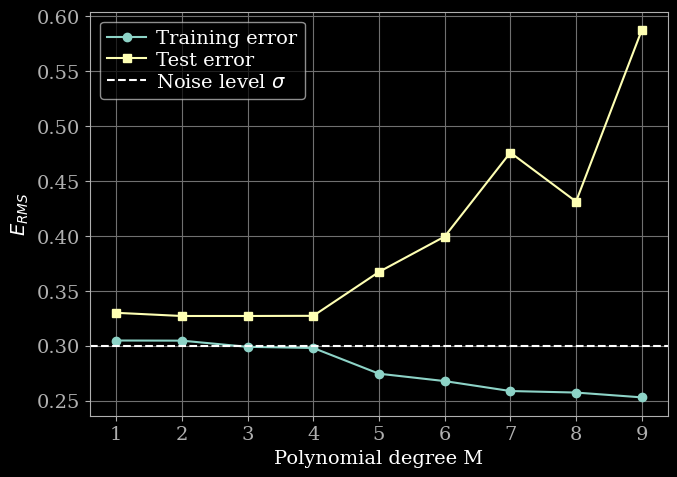

In [65]:
indices = np.random.permutation(N[1])
N_train = int(0.25 * N[1])

train_idx = indices[:N_train]
test_idx  = indices[N_train:]

x_train, y_train = x[train_idx], y[train_idx]
x_test,  y_test  = x[test_idx],  y[test_idx]

# fit polynomials and compute E_RMS
M_values = range(1, 10)

E_rms_train = []
E_rms_test  = []

for M in M_values:
    p0 = np.zeros(M + 1)
    coeffs, _ = curve_fit(poly, x_train, y_train, p0=p0)

    y_train_pred = poly(x_train, *coeffs)
    y_test_pred  = poly(x_test,  *coeffs)

    E_rms_train.append(np.sqrt(np.mean((y_train - y_train_pred)**2)))
    E_rms_test.append(np.sqrt(np.mean((y_test - y_test_pred)**2)))

# plotting
plt.figure(figsize=(7, 5))
plt.plot(M_values, E_rms_train, 'o-', label='Training error')
plt.plot(M_values, E_rms_test,  's-', label='Test error')

plt.axhline(sigma, color='w', ls='--', label=r'Noise level $\sigma$')

plt.xlabel('Polynomial degree M')
plt.ylabel(r'$E_{RMS}$')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

This plot shows that the data is not very well fit to the higher order polynomial fit I generated initially. In other words, the higher order polynomial fits do not generally match the data.

A good model would fit the $\sin(2\pi x)$ curve but not the noise. The plot shows that with these models:

* Training error becomes unrealistically small

* Test error grows because the model fit noise patterns that don’t repeat

---

### **Activity 2: Linear Regression with Regularization**

**Now introduce a regularization term in your calculation according to Eq. 1.4 and evaluate the fit parameters for $\ln(\lambda)=-18$ and $\ln(\lambda)=0$. Compare your results to fig. 1.7.**

Equation 1.4:
$$
\tilde{E}(\mathbf{w})=\frac{1}{2}\sum_{i=1}^{N} \{y(x_n,\mathbf{w})-t_n\}^2 + \frac{\lambda}{2}\|\mathbf{w}^2\|
$$

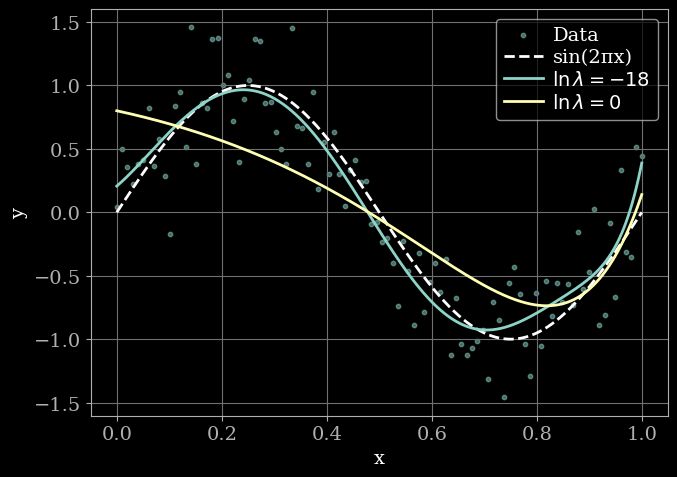

In [66]:
x = xx[1]
t = yy[1]

# regularized error (eq. 1.4)
def E_tilde(w, x, t, lam):
    residuals = poly(x, *w) - t
    data_term = 0.5 * np.sum(residuals**2)
    reg_term = 0.5 * lam * np.sum(w**2)
    return data_term + reg_term

# lambda values
ln_lambdas = [-18, 0]
lambdas = [np.exp(l) for l in ln_lambdas]

fits = {}
for lam in lambdas:
    w0 = np.zeros(M + 1)
    result = minimize(E_tilde, w0, args=(x, t, lam))
    fits[lam] = result.x

# plot fits
x_fine = np.linspace(0, 1, 500)

plt.figure(figsize=(7, 5))
plt.scatter(x, t, s=10, label='Data', alpha=0.5)
plt.plot(x_fine, np.sin(2*np.pi*x_fine), 'w--', lw=2, label='sin(2πx)')

for lam, w in fits.items():
    plt.plot(
        x_fine,
        poly(x_fine, *w),
        lw=2,
        label=fr'$\ln\lambda = {np.log(lam):.0f}$'
    )

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

#### **Analysis 2A**  
**Describe the underlying reason why fig 1.7 left and right are so different.**

The two fits in Figure 1.7 differ because the regularization term ($\frac{\lambda}{2}\|\mathbf{w}^2\|$) penalizes large polynomial coefficients. For $\ln(\lambda)=−18$, the penalty is negligible and the model overfits the noisy data, producing large oscillations. For $\ln(\lambda)=0$, the penalty strongly suppresses high-order coefficients, resulting in a much smoother function that captures the underlying trend while ignoring noise. Thus, regularization reduces variance and improves generalization by limiting the effective complexity of the model.

---

#### **Anaylsis 2B**
**Reproduce figure 1.8 and explain the reasons underlying the worse outcome when $\lambda$ is close to 0 or very high.**

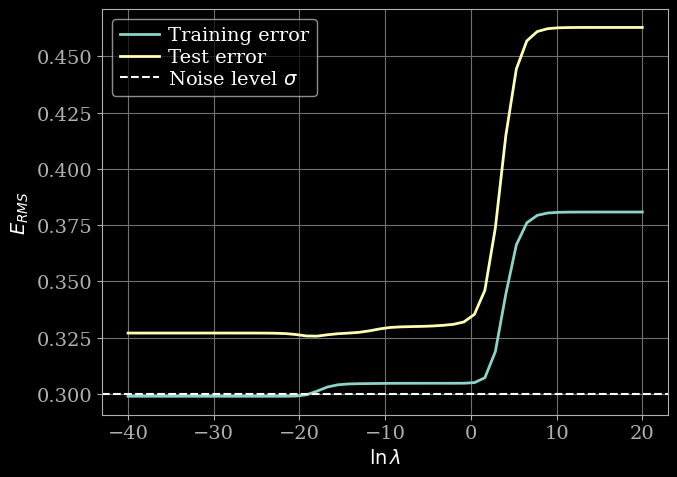

In [67]:
M = 9
N = len(x)

# scan across lambda
ln_lambdas = np.linspace(-40, 20)
lambdas = np.exp(ln_lambdas)

E_rms_train = []
E_rms_test  = []

for lam in lambdas:
    w0 = np.zeros(M + 1)
    result = minimize(E_tilde, w0, args=(x_train, y_train, lam))
    w_opt = result.x

    # training RMS
    res_train = poly(x_train, *w_opt) - y_train
    E_train = 0.5 * np.sum(res_train**2)
    E_rms_train.append(np.sqrt(2 * E_train / len(x_train)))

    # test RMS
    res_test = poly(x_test, *w_opt) - y_test
    E_test = 0.5 * np.sum(res_test**2)
    E_rms_test.append(np.sqrt(2 * E_test / len(x_test)))

# plot
plt.close('all')
plt.figure(figsize=(7, 5))
plt.plot(ln_lambdas, E_rms_train, lw=2, label='Training error')
plt.plot(ln_lambdas, E_rms_test,  lw=2, label='Test error')
plt.axhline(sigma, color='w', ls='--', label=r'Noise level $\sigma$')

plt.xlabel(r'$\ln \lambda$')
plt.ylabel(r'$E_{RMS}$')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


Figure 1.8 shows that the RMS error is large for both very small and very large values of $\lambda$. For $\lambda\approx 0$, regularization is ineffective and the high-degree polynomial overfits the noise, leading to large variance. For large $\lambda$, the regularization term suppresses the coefficients, causing underfitting and large bias. An intermediate value of $\lambda$ balances these effects and minimizes the RMS error.

---

### **Activity 3**

Consider a rare disease on which we know: 
1. The probability of contracting it is 0.0001
2. A test for the disease gives:  
    * P(+|A)=0.98
    * P(+|not A)=0.03 (*false positive*)

Do you need to be worried if you get (+) as a test result? In other words, what is the posterior probability?

---

**Goal: $P(A \mid +)$**  

Bayes' theorem:
$$
P(A \mid +) = \frac{P(+ \mid A)\,P(A)}{P(+)}
$$

Normalization term (evidence):
$$
P(+) &= P(+ \mid A)P(A) + P(+ \mid \neg A)P(\neg A) \\
     &= (0.98)(0.0001) + (0.03)(0.9999) \\
     &= 0.000098 + 0.029997 \\
     &= \boxed{0.030095} \\
$$

Posterior probability:
$$
P(A \mid +) = \frac{0.000098}{0.030095} \approx 3.26 \times 10^{-3}
$$

$$
\boxed{P(A \mid +) \approx 0.33\%}
$$

In other words, I would only be a little worried about a positive test result.


### **Activity 4: Bayesian Curve Fitting**  
**In this activity, you will use the M=9 polynomial as the model to be fitted to the noisy sinusoidal function data set you generated in Activity 1.**  
**Code the procedure described in Section 1.2.6 (eq. 1.68-1.72) to produce figure 1.17. Please note that you will use M=9, and the parameters $\alpha=5e-3$ and $\beta=11.1$ are considered input values.**

In [80]:
### For this activity, I used the code methods we worked on together during class, it builds on everything else we've done already

def func(x):
    return np.sin(2 * np.pi * x)

def design_matrix(x, M):
    """
    Build design matrix Phi with columns [x^0, x^1, ..., x^M].
    Shape: (N, M+1)
    """
    return np.vander(x, N=M+1, increasing=True)

def bayesian_posterior_params(x_train, t_train, M, alpha, beta):
  """
  Returns posterior covariance S and posterior mean m_N (for weights w):
    S^{-1} = alpha I + beta Phi^T Phi
    m_N    = beta S Phi^T t
  """
  Phi = design_matrix(x_train, M)
  I = np.eye(M + 1)

  S_inv = alpha * I + beta * (Phi.T @ Phi)
  S = np.linalg.inv(S_inv)
  mN = beta * (S @ Phi.T @ t_train)

  return S, mN


def bayesian_predictive(x_test, S, mN, M, beta):
  """
  Predictive distribution p(t|x, D) = N(t | m(x), s^2(x))
    m(x)  = phi(x)^T mN
    s^2(x)= beta^{-1} + phi(x)^T S phi(x)
  """
  Phi_test = design_matrix(x_test, M)

  mean = Phi_test @ mN
  var = (1.0 / beta) + np.sum((Phi_test @ S) * Phi_test, axis=1)

  return mean, var


def plot_bayesian_curve_fit(N=10, sigma=0.3, seed=0, M=9, alpha=5e-3, beta=11.1):
  # training data
  x_train, t_train = xx[1], yy[1]

  # posterior over weights
  S, mN = bayesian_posterior_params(x_train, t_train, M, alpha, beta)

  # prediction grid
  x_plot = np.linspace(0, 1, 400)
  y_true = func(x_plot)

  # predictive mean/variance
  mean, var = bayesian_predictive(x_plot, S, mN, M, beta)
  std = np.sqrt(var)

  # plot
  plt.figure(figsize=(7,5))
  plt.scatter(x_train, t_train, alpha=0.5, label="data")
  plt.plot(x_plot, y_true, "C0", lw=2, label=r"$\sin(2\pi x)$")
  plt.plot(x_plot, mean, "C1", lw=2, label="predictive mean")

  plt.fill_between(x_plot, mean - std, mean + std, alpha=0.2, label=r"$\pm 1\sigma$ band")

  plt.title(f"Bayesian curve fitting (M={M}, alpha={alpha}, beta={beta}, N={N})")
  plt.xlabel("x")
  plt.ylabel("y")
  plt.grid(True, alpha=0.3)
  plt.legend()
  plt.show()

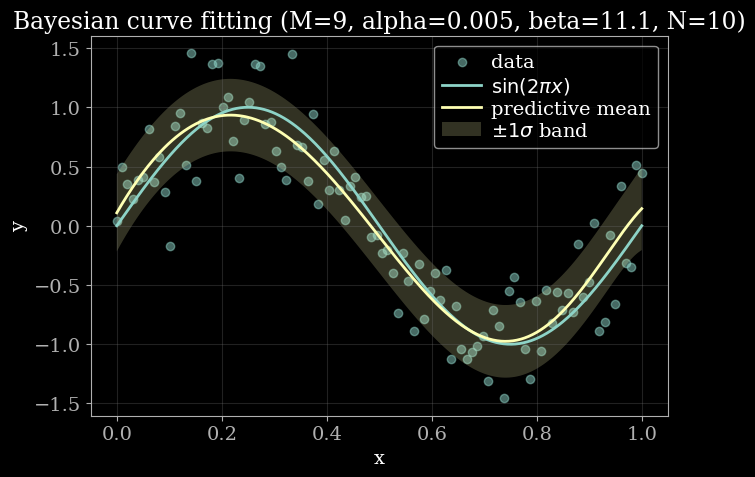

In [78]:
plot_bayesian_curve_fit(N=10, sigma=0.3, seed=0, M=9, alpha=5e-3, beta=11.1)

#### **Analysis 4A**  
**Note that $\beta=11.1$ should be expected from this data set. Please explain why based on the physical significance of $\beta$ in the system that you are modelling.**  

In this system, $\beta$ represents the precision (inverse variance) of the measurement noise. Since the data were generated with Gaussian noise of standard deviation $\sigma=0.3$ the corresponding precision is $\beta = 1/\sigma^2 \approx 11.1$ This means $\beta$ quantitatively encodes our confidence in the observed noisy data.

---

#### **Analysis 4B**  
**Compare this approach with the frequentist fitting approach**  

The Bayesian approach generalizes frequentist fitting by treating model parameters probabilistically and producing a predictive distribution. This gives a curve of expected values and uncertainty estimates that incorporate both observation noise and uncertainty due to limited data. The frequentist approach provides only a single best-fit curve without direct error bands.

---